In [1]:
%matplotlib notebook
import pandas as pd
import lightkurve as lk
from del_scu_search import *
import matplotlib.pyplot as plt
from ptv_search import *

140596513
LightCurveFileCollection of 7 objects:
TessLightCurveFile(TICID: 140596513) 
TessLightCurveFile(TICID: 140596513) 
TessLightCurveFile(TICID: 140596513) 
TessLightCurveFile(TICID: 140596513) 
TessLightCurveFile(TICID: 140596513) 
TessLightCurveFile(TICID: 140596513) 
TessLightCurveFile(TICID: 140596513) 

27.880500556138486
27.403915564439558
20.264984739987767
25.946791498234234
26.295436598744573
21.772004768680745
24.45408109839218


<IPython.core.display.Javascript object>


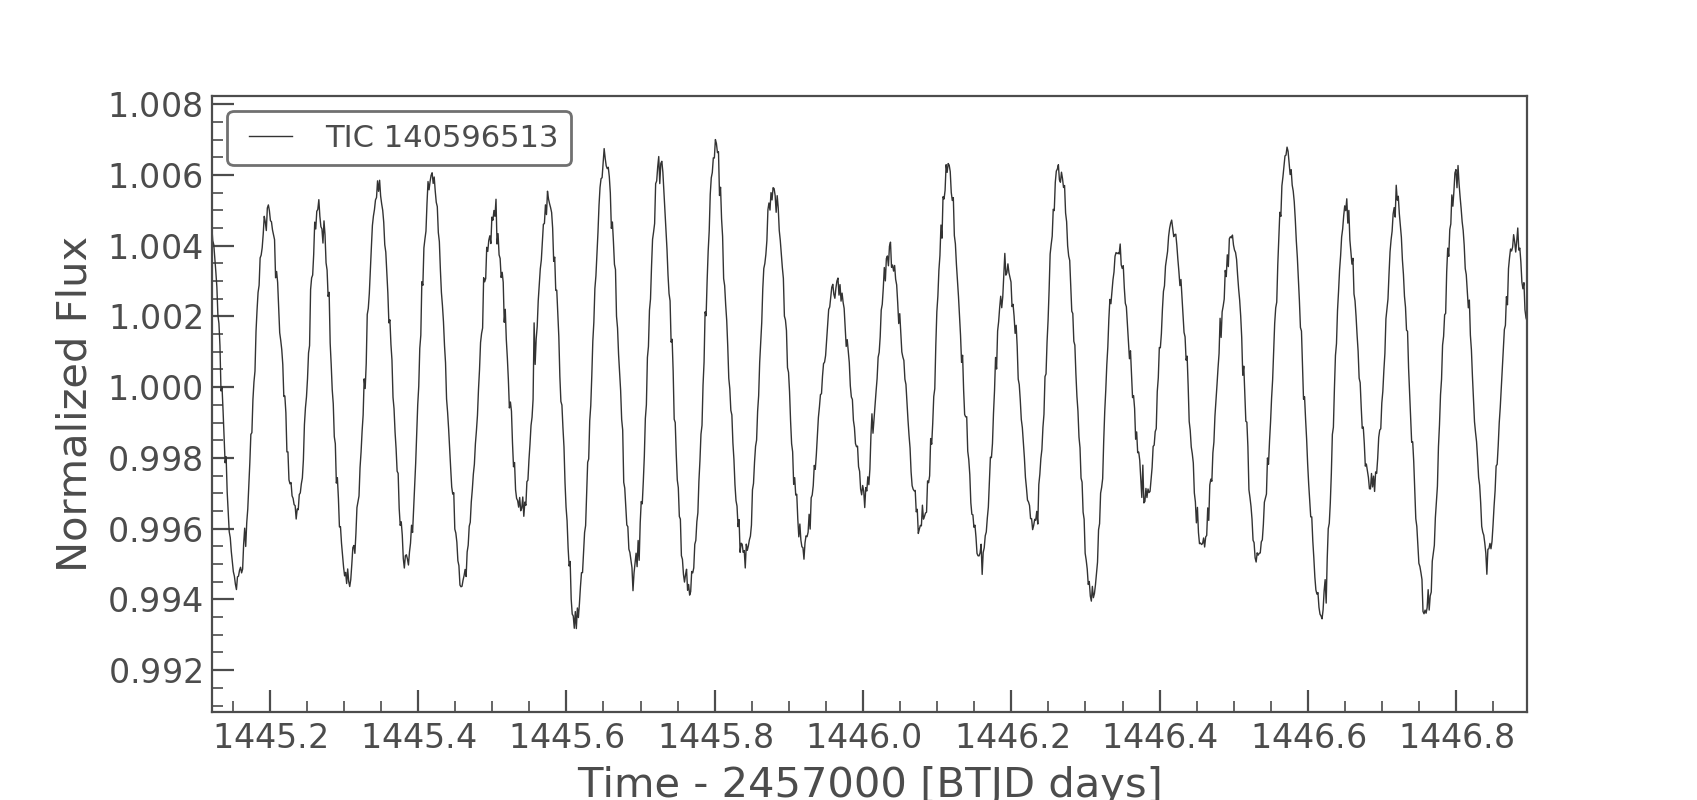

In [12]:
astars = pd.read_csv('tessAstars.csv')
star  = astars['ID'][0]

ticid = '140596513'
print(ticid)
lcs = lk.search_lightcurvefile(ticid).download_all()
lc = None
print(lcs)
#concatenate the available TESS sectors crudely
for lcfile in lcs:
    if lc is None:
        print(lcfile.time[-1]-lcfile.time[0])
        lc = lcfile.PDCSAP_FLUX.normalize().flatten(window_length=201,break_tolerance=10)
    else:
        print(lcfile.time[-1]-lcfile.time[0])
        lc = lc.append(lcfile.PDCSAP_FLUX.normalize().flatten(window_length=201,break_tolerance=10))

lc = lc.remove_nans()
lc.plot()

[  13.05059109  706.95060847  706.95794644  733.05283893  733.06017691
 1426.95285631 1426.96019428 1426.96753226 1453.05508677 1453.06137647
 1453.06976272]
13.051115231516814


<IPython.core.display.Javascript object>


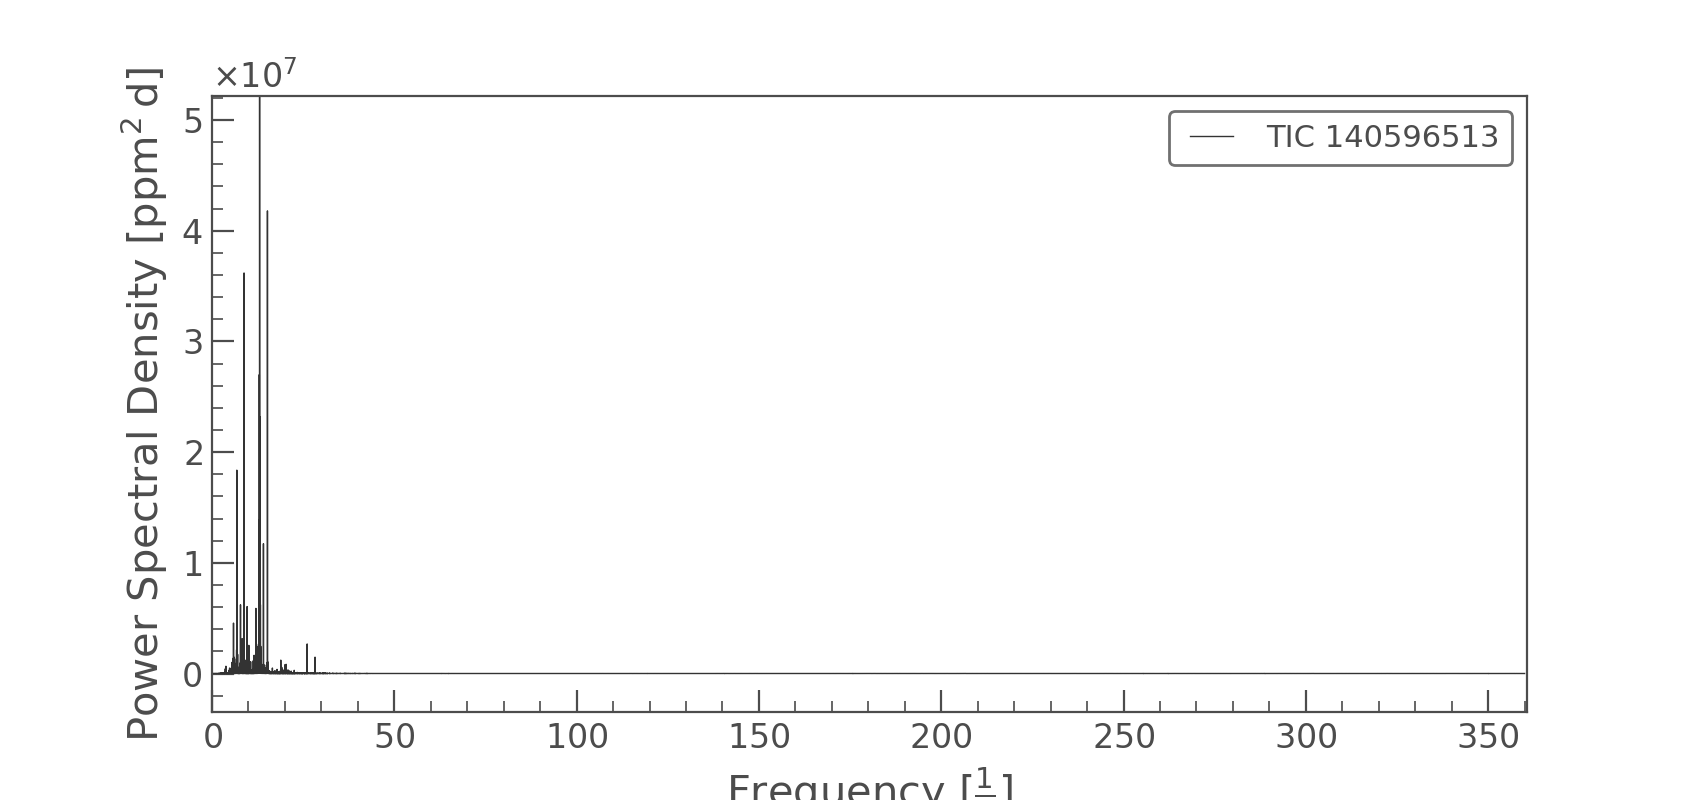

In [13]:
del_scu = is_delta_scuti(lc)
if del_scu is not False:
    print(del_scu)
    pg = lc.to_periodogram()
    freqs = [pg.frequency_at_max_power.value]
    print(pg.frequency_at_max_power.value)
    pg.plot()